# Similarity Based Learning: the k-Nearest Neighbor (kNN) Regression

#### Organized and prepared by: Acd. Christopher Monterola, PhD
#### Revamped by: Matthew R. Maulion, MSc

### This notebook used the following reference(s):

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017

# General Idea 

Unlike the previous section that entails **classifying** the data on various class labels, k_NN **regression** is concerned in predicting a continuous number, or a floating-point number (data scientists, computer scientist) or real number (mathematicians).

Similar to kNN classifier, kNN regression is a *non-parametric* and *instance-based* learning algorithm.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

To illustrate regression algorithms, we will use the synthetic **wave dataset** shown
below. The wave dataset only has a single input feature, and a continuous target
variable (or response) that we want to model.
The plot below is showing the single feature on the x-axis, with the data points as <font color = orange> orange </font> dots. For each data point, the target output is plotted in <font color = blue> blue </font> on the y-axis.

Text(0, 0.5, 'Target')

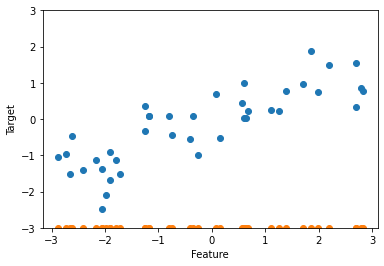

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Similar to kNN classification, we start by using a single nearest neighbor, this time using the wave dataset. Shown below are the predictions by one-nearest-neighbor regression on the wave data set, we added three test data points as <font color = green> green </font> crosses on the x axis. 

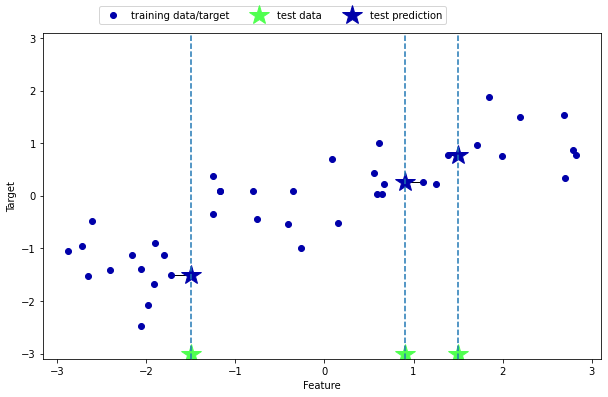

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Next we show the prediction using three-nearest-neighbor regression on the wave data set, again we have added three test data points as <font color = green> green </font> crosses on the x axis.

**So how will the prediction be made?**

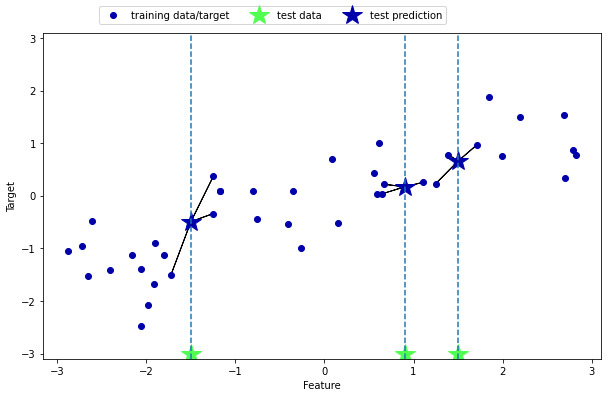

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn. It looks much like the KNeighborsClassifier in our past lecture.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=3, p=2,
weights='uniform')

KNeighborsRegressor(n_jobs=1, n_neighbors=3)

In [12]:
y

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
       -2.47196233, -1.52730805,  1.49417157,  1.00032374,  0.22956153,
       -1.05979555,  0.7789638 ,  0.75418806, -1.51369739, -1.67303415,
       -0.90496988,  0.08448544, -0.52734666, -0.54114599, -0.3409073 ,
        0.21778193, -1.12469096,  0.37299129,  0.09756349, -0.98618122,
        0.96695428, -1.13455014,  0.69798591,  0.43655826, -0.95652133,
        0.03527881, -2.08581717, -0.47411033,  1.53708251,  0.86893293,
        1.87664889,  0.0945257 , -1.41502356,  0.25438895,  0.09398858])

Now, we can make predictions on the test set:

In [13]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

We can also evaluate the model using the score method, which for regressors returns
the $R^2$ score.
The $R^2$ score, also known as coefficient of determination, is a measure of goodness
of a prediction for a regression model, and yields a score up to 1. A value of 1
corresponds to a perfect prediction, and a value of 0 corresponds to a constant model
that just predicts the mean of the training set responses y_train. Note that $R^2$ can be negative.

\begin{equation}
R^2=1 -\sum_i\frac{(y_i -f_i)^2}{(y_i - \bar{y})^2}
\end{equation}

where $y_i$ is the actual value, $f_i$ is the predicted value and $\bar{y}$ is the mean of ${y_i}$.

In [14]:
reg.score(X_test, y_test)

0.8344172446249605

Here, the score is 0.83 which indicates a relatively good model fit. Alternatively, i can implement the $R^2$ score using the more basic $r2_score$ command in sklearn:

In [15]:
from sklearn.metrics import r2_score
r2_score(reg.predict(X_test), y_test)

0.8931436310563322

WAIT!!! The result is different! Why? 

## Analyzing k nearest neighbors regression

For our one-dimensional dataset, we can see what the predictions look like for all
possible feature values. To do this, we create a test-dataset consisting of many points
on the line.

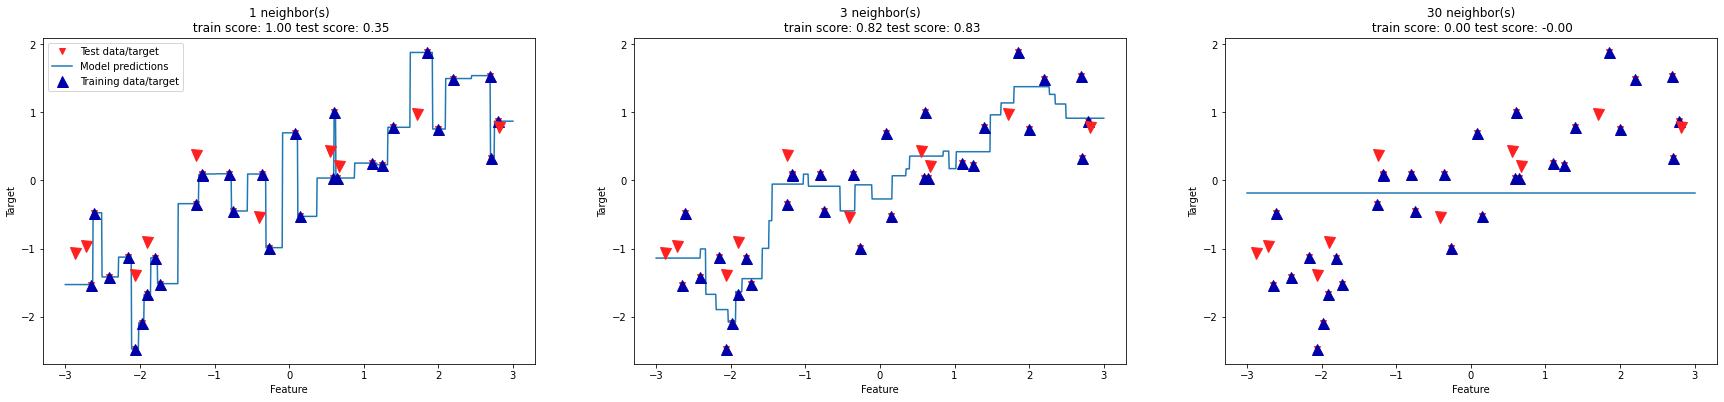

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # create 1000 data points, evenly spaced between -3 and 3
for n_neighbors, ax in zip([1, 3, 30], axes): # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='best')
pass

The <font color=blue> blue line </font>is the prediction made by the model for all points on the line. 

Using only a single neighbor, each point in the training set has an obvious influence
on the predictions, and the predicted values go through all of the data points. This
leads to a very unsteady prediction. 

Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

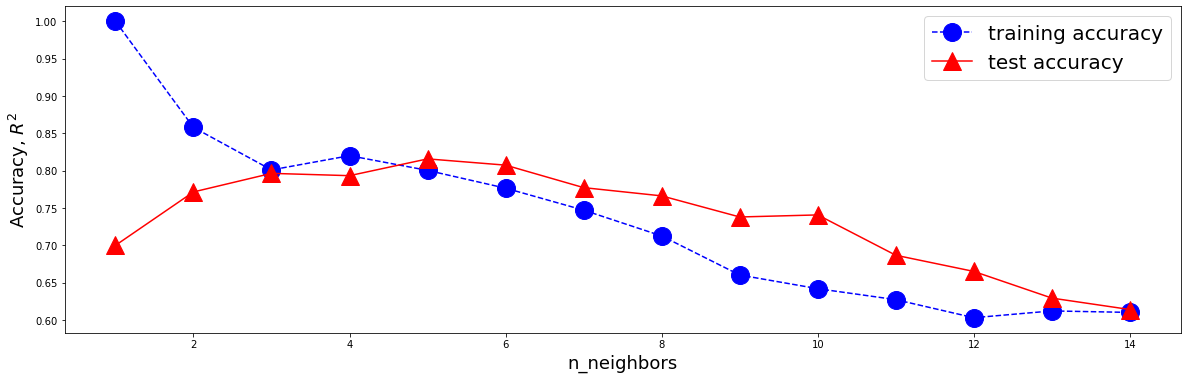

In [17]:
X, y = mglearn.datasets.make_wave(n_samples=40) # split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 15) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    

fig = plt.figure(figsize=(20, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()
pass

In [18]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1,100,1):
    X, y = mglearn.datasets.make_wave(n_samples=40) # split the wave dataset into a training and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 29) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

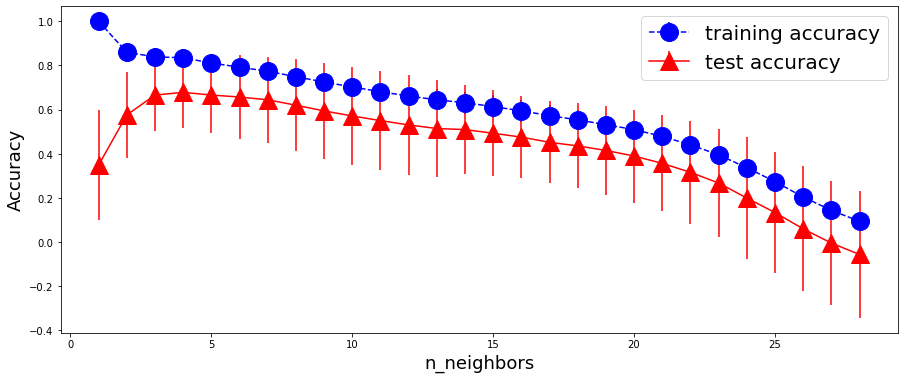

In [20]:
fig = plt.figure(figsize=(15, 6))

import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

1. Comment on the optimal *n_neighbors*.
2. What will happen when *n_neighbors* will include most of the data.

## Example 2.  A periodic signal

Consider a Cosine signal, what is the optimal **n_neighbors** to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

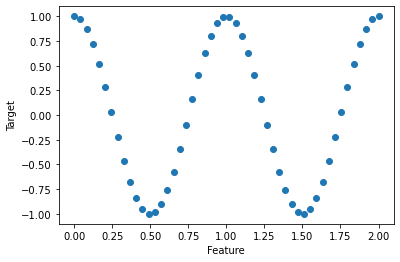

In [21]:
X = np.linspace(0.0, 2.0)
y = np.cos(2 * np.pi * X)

plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [23]:
from numpy import array
XX=np.reshape(X, (len(X),-1))  #Reshape the list to array

In [24]:
XX

array([[0.        ],
       [0.04081633],
       [0.08163265],
       [0.12244898],
       [0.16326531],
       [0.20408163],
       [0.24489796],
       [0.28571429],
       [0.32653061],
       [0.36734694],
       [0.40816327],
       [0.44897959],
       [0.48979592],
       [0.53061224],
       [0.57142857],
       [0.6122449 ],
       [0.65306122],
       [0.69387755],
       [0.73469388],
       [0.7755102 ],
       [0.81632653],
       [0.85714286],
       [0.89795918],
       [0.93877551],
       [0.97959184],
       [1.02040816],
       [1.06122449],
       [1.10204082],
       [1.14285714],
       [1.18367347],
       [1.2244898 ],
       [1.26530612],
       [1.30612245],
       [1.34693878],
       [1.3877551 ],
       [1.42857143],
       [1.46938776],
       [1.51020408],
       [1.55102041],
       [1.59183673],
       [1.63265306],
       [1.67346939],
       [1.71428571],
       [1.75510204],
       [1.79591837],
       [1.83673469],
       [1.87755102],
       [1.918

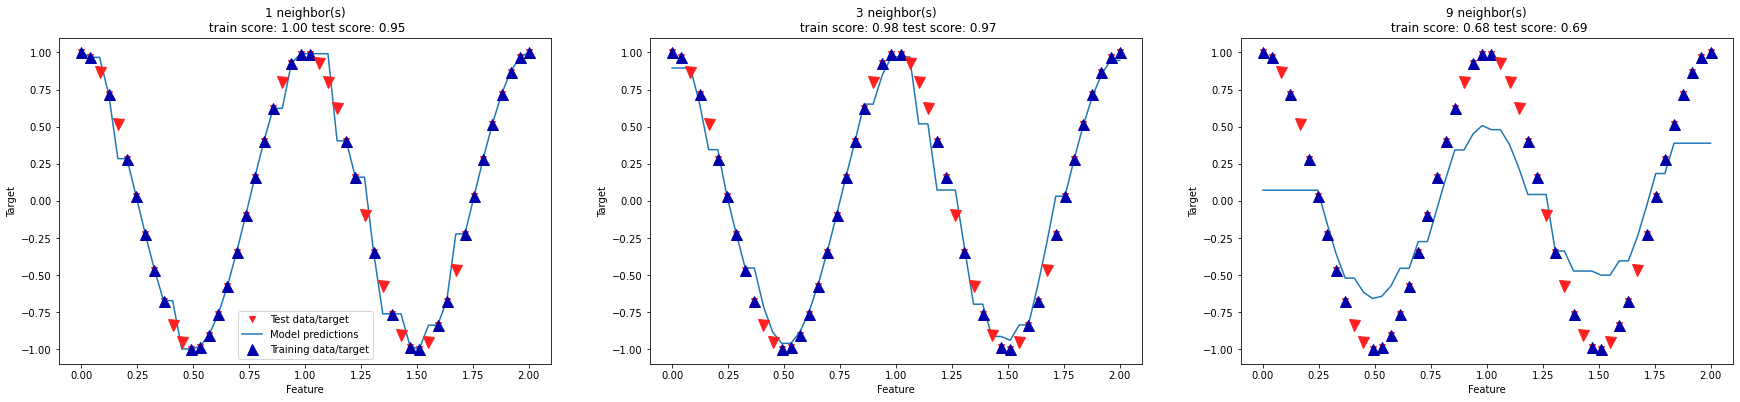

In [25]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 2, 50).reshape(50, -1) # create 50 data points, evenly spaced between 0 and 2
#plt.suptitle("nearest_neighbor_regression")

import pylab as plot
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)

for n_neighbors, ax in zip([1, 3, 9], axes): # make predictions using 1, 3 or 9 neighbors\
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [26]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 15) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

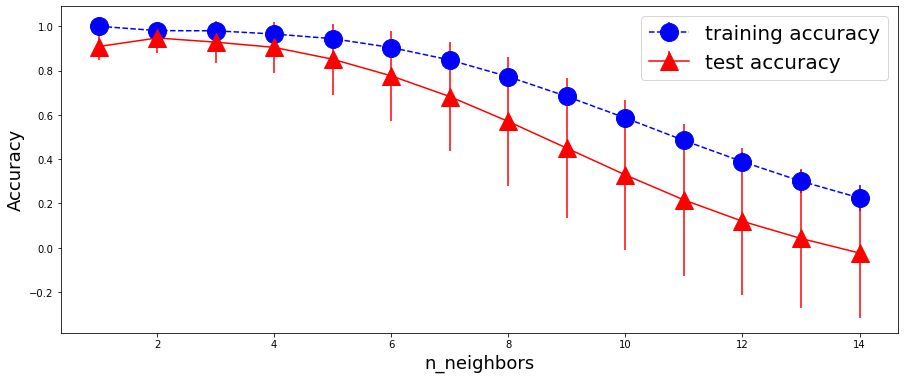

In [27]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

## Example 3.  A periodic but decaying signal

Consider a Cosine signal, what is the optimal n_neighbor to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

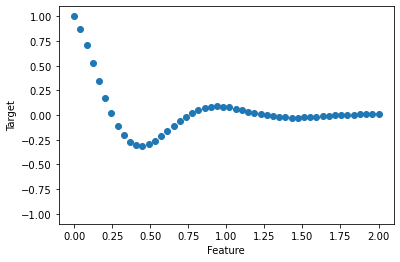

In [28]:
X = np.linspace(0.0, 2.0)
gulo=np.linspace(0.0, 5.0)

y = np.cos(2 * np.pi * X)* np.exp(-gulo)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [30]:
from numpy import array
XX=np.reshape(X, (len(X),-1))

XX

array([[0.        ],
       [0.04081633],
       [0.08163265],
       [0.12244898],
       [0.16326531],
       [0.20408163],
       [0.24489796],
       [0.28571429],
       [0.32653061],
       [0.36734694],
       [0.40816327],
       [0.44897959],
       [0.48979592],
       [0.53061224],
       [0.57142857],
       [0.6122449 ],
       [0.65306122],
       [0.69387755],
       [0.73469388],
       [0.7755102 ],
       [0.81632653],
       [0.85714286],
       [0.89795918],
       [0.93877551],
       [0.97959184],
       [1.02040816],
       [1.06122449],
       [1.10204082],
       [1.14285714],
       [1.18367347],
       [1.2244898 ],
       [1.26530612],
       [1.30612245],
       [1.34693878],
       [1.3877551 ],
       [1.42857143],
       [1.46938776],
       [1.51020408],
       [1.55102041],
       [1.59183673],
       [1.63265306],
       [1.67346939],
       [1.71428571],
       [1.75510204],
       [1.79591837],
       [1.83673469],
       [1.87755102],
       [1.918

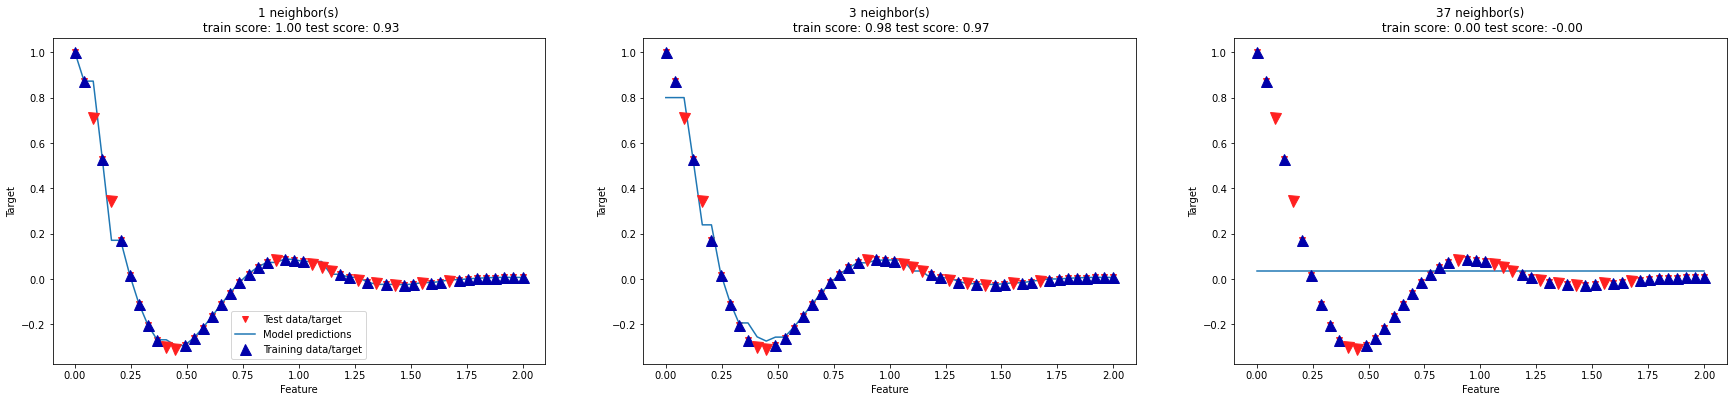

In [31]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
line = np.linspace(0, 2, 50).reshape(50, -1)  # create 1000 data points, evenly spaced between -3 and 3

import pylab as plot #plt.suptitle("nearest_neighbor_regression")

params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)

for n_neighbors, ax in zip([1, 3, 37], axes): # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [32]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 15) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

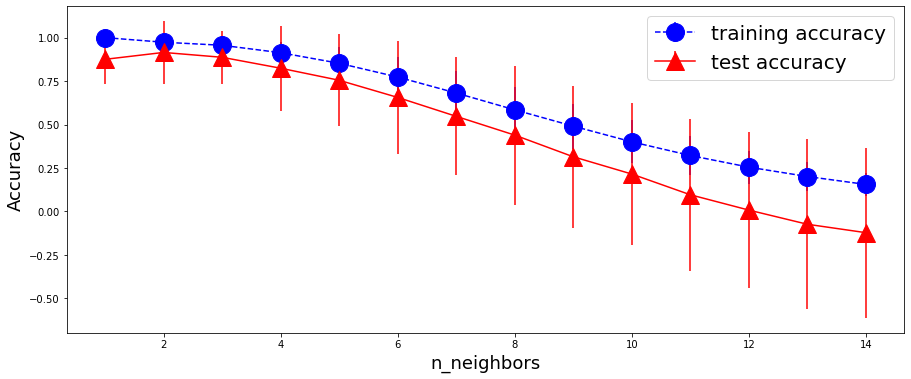

In [33]:
fig = plt.figure(figsize=(15, 6))

import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

## Example 4.  Undersampled periodic signal

Consider a Cosine signal, what is the optimal n_neighbor to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

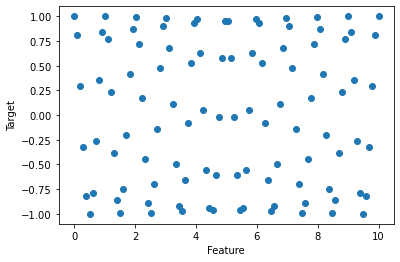

In [34]:
X = np.linspace(0.0, 10.0,100)
y = np.cos(2 * np.pi * X)

plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [35]:
from numpy import array
XX=np.reshape(X, (len(X),-1))

XX

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

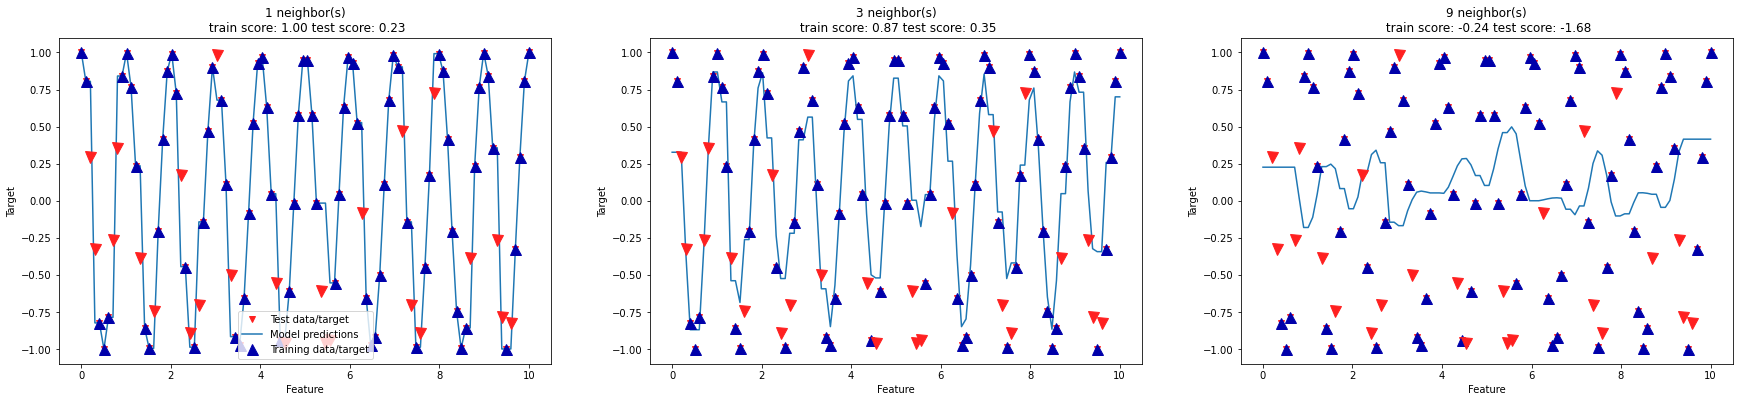

In [36]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 10, len(XX)).reshape(len(XX), -1)
import pylab as plot #plt.suptitle("nearest_neighbor_regression")
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [37]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 60) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
pass

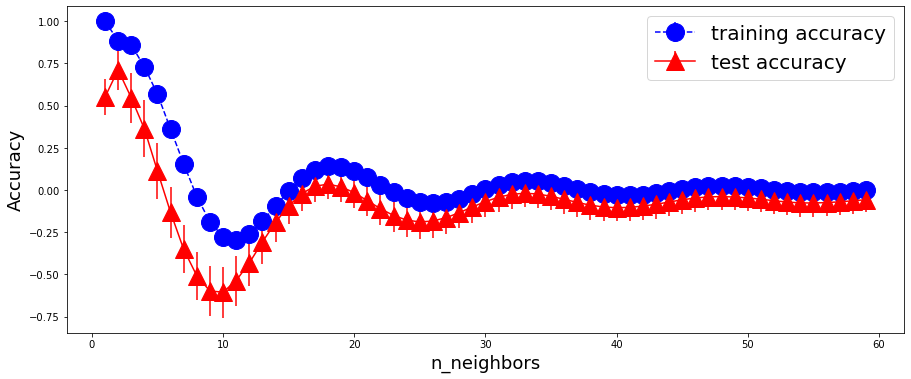

In [38]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

## Key points:

**1. Good data generally translates to good prediction.**

The unreasonable effectiveness of data -- Google's Research Director Peter Norvig claiming that "We don’t have better algorithms. We just have more data." 

 <img src="unreasonable_data.png" width="600" />


 [https://www.researchgate.net/publication/224396640_The_Unreasonable_Effectiveness_of_Data]

The problem here is called *confusion set disambiguation,* which sounds fancy but just means that the model has to decide whether to fill in a blank in a sentence with T-O to, T-O-O too, or T-W-O two.

<img src="scaling_corpora.png" width="700"  />
 
 
 
*In a nutshell, increasing the amount of data improves every algorithm's generalization error. But, for large amounts of data, the improvements start becoming negligible. And unless the algorithm is very bad, they all settle down to some accuracy level.* 

**2. k-NN regression and classifier can only interpolate**

Again, kNN is an *instance based* algorithm and can only make predictions based on its corpora of data. For values outside the range of the training samples (max or min), it will fail.

**3. Single most important parameter is n_neighbors**

Scanning over the accuracy as a function of **n_neighbors** improves the effectiveness and reliability of the algorithm.

The optimal choice of the value **n_neighbors** is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.


### Learn more here: [http://scikit-learn.org/stable/modules/neighbors.html]

## End.